## Acquisition Analytics : Bank Marketing

We will understand the business objective and understand the data using univariate and multivariate analysis. Then we'll build multiple supervised learning models, choose the best among them and analyze the financial benefits of the analytics project.

- Data Understanding
- Data Cleaning
- Data Preparation
- Data Modelling
- Model Evaluation

The objective is to reduce the customer acquisition cost by targeting the ones who are likely to buy and to improve the response rate, i.e. the fraction of prospects who respond to the campaign.

### Data Understanding

The first step in solving any machine learning problem is data understanding. We will import the requisite libraries and apply univariate and multivariate analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan = pd.read_csv("bank_marketing.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [3]:
loan.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
dtype: int64

We can note that the dataset has 41188 data entries across 21 columns, one of them being the response (Target variable). Another thing to note is that there are no null values. That is, the dataset is completely clean.

In [4]:
# let's look at the first few rows of the dataframe
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Looking at all the column names
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response'],
      dtype='object')

In [6]:
loan['response'].value_counts()

no     36548
yes     4640
Name: response, dtype: int64

As we note that the response variable has 'yes' and 'no' responses, we will convert it to 1 and 0 respectively

In [7]:
loan['response'] = loan['response'].map({'yes': 1, 'no': 0})

In [8]:
loan['response'].head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [9]:
loan['response'].value_counts()

0    36548
1     4640
Name: response, dtype: int64

In [10]:
# Copy the dataset into a back up dataframe for future use

loan_copy = loan

In [11]:
# Determine the percentage of people who have bought the investment product, that is those who have the response varibale as 1

100*(loan['response'].sum()/loan['response'].count()).round(4)

11.27

### Exploratory Data Analysis

Now, we will do Exploratory Data Analysis on individual features and look for patterns.

First, we will look at the client data.

- Age
- Job : type of job
- Marital : marital status
- Education
- Default: has credit in default?
- Housing: has housing loan?
- Loan: has personal loan?

#### Age

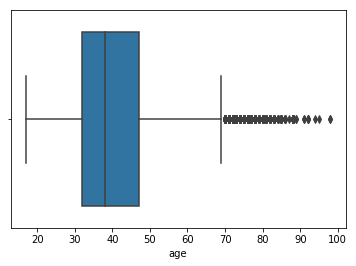

In [12]:
sns.boxplot(x='age', data=loan)
plt.show()

In [13]:
# Since there are a fair few data entries with age > 71, we will club all of those ages at 71 (since we can assume 
# that the behaviour will not change significantly with age at age above 70)

loan['age'][loan['age']>71] =71

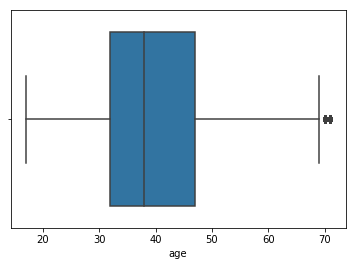

In [14]:
sns.boxplot(x='age', data=loan)
plt.show()

In [15]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(10,loan['age'].max() + 10, 10)
loan['age_bins'] = pd.cut(loan['age'], bins, include_lowest=True)

In [16]:
No_of_prospect = loan.groupby('age_bins')['response'].count().reset_index(name = 'No.of_prospect')

In [17]:
count_prospects = loan[loan['response']==1].groupby('age_bins')['response'].count().reset_index(name = 'count_prospects')

In [18]:
agg_age = No_of_prospect.merge(count_prospects, on='age_bins')

In [19]:
agg_age['response_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(3)

In [20]:
agg_age

,age_bins,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",140,57,40.7
1,"(20.0, 30.0]",7243,1067,14.7
2,"(30.0, 40.0]",16385,1597,9.7
3,"(40.0, 50.0]",10240,837,8.2
4,"(50.0, 60.0]",6270,668,10.7
5,"(60.0, 70.0]",488,212,43.4
6,"(70.0, 80.0]",422,202,47.9


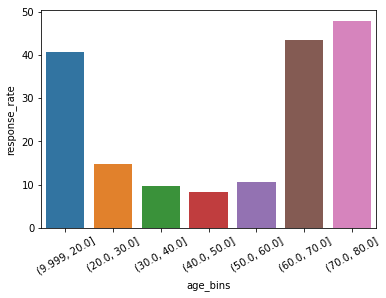

In [21]:
ax = sns.barplot(x='age_bins', y='response_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

As we can see, the youngest and the eldest are the most likely to buy the investment product being offered by the bank.

In [22]:
# Note that we have added a new column named age bucket to the table

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_bins
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"


Similarly, we will look at the relation between response rate and job. Note that since job is already a categorical variable, we don't need to bucket the data

#### Job

In [23]:
loan['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [24]:
count_prospects_job = loan.groupby('job')['response'].sum().reset_index(name = 'count_prospects')

In [25]:
No_of_prospect_job = loan.groupby('job')['response'].count().reset_index(name = 'No_of_prospects')

In [26]:
agg_job = count_prospects_job.merge(No_of_prospect_job, on = 'job')

In [27]:
agg_job['response_rate'] = 100*(agg_job['count_prospects']/agg_job['No_of_prospects']).round(4)

In [28]:
agg_job

,job,count_prospects,No_of_prospects,response_rate
0,admin.,1352,10422,12.97
1,blue-collar,638,9254,6.89
2,entrepreneur,124,1456,8.52
3,housemaid,106,1060,10.00
4,management,328,2924,11.22
5,retired,434,1720,25.23
6,self-employed,149,1421,10.49
7,services,323,3969,8.14
8,student,275,875,31.43
9,technician,730,6743,10.83


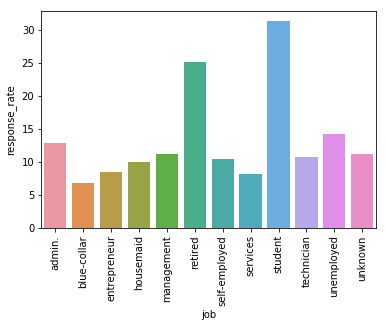

In [29]:
ax = sns.barplot(x='job', y='response_rate', data=agg_job)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

We can draw similarities from the age response analysis where we found that the youngest and eldest were most likely to respond in a positive manner. It is rreiterated by the above analysis, where we notice that student and retired have the highest response rates.

#### Marital

In [30]:
loan['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Since there are 80 entries which list marital status as 'unknown', we will assign them to the biggest group, which is, 'married'.

In [31]:
loan.replace({'marital' : { 'unknown' : 'married'}}, inplace=True)

In [32]:
count_prospects_marital = loan.groupby('marital')['response'].sum().reset_index(name = 'count_prospects')

In [33]:
No_of_prospect_job = loan.groupby('marital')['response'].count().reset_index(name = 'No_of_prospects')

In [34]:
agg_marital = count_prospects_marital.merge(No_of_prospect_job, on = 'marital')

In [35]:
agg_marital['response_rate'] = 100*(agg_marital['count_prospects']/agg_marital['No_of_prospects']).round(4)

In [36]:
agg_marital

,marital,count_prospects,No_of_prospects,response_rate
0,divorced,476,4612,10.32
1,married,2544,25008,10.17
2,single,1620,11568,14.00


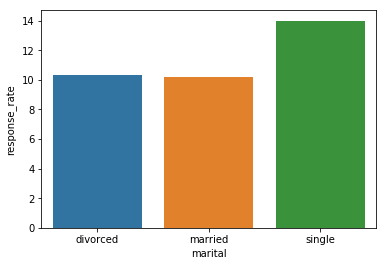

In [37]:
ax = sns.barplot(x='marital', y='response_rate', data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You may note that there is a slight uptick in response rate for single customers, this can be attributed in part to the fact that people under the age of 20 have a very high response rate. 

#### Education

In [38]:
loan['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

To simplify the problem, we are going to convert the educational qualifications to simple buckets of primary educations, secondary education, tertiary education and professional courses. Also note that there are 18 entries listing the educational status as illiterate. Since the closest group to them is primary education, we are going to assign all entries with educational status as illiterate to primary education.

In [39]:
loan.replace({'education' : { 'basic.9y' : 'Primary_Education', 'basic.4y' : 'Primary_Education','basic.6y' : 'Primary_Education','illiterate' : 'Primary_Education',
                             'high.school' : 'Secondary_Education', 'university.degree' : 'Tertiary_Education' }}, inplace=True)

In [40]:
loan['education'].value_counts()

Primary_Education      12531
Tertiary_Education     12168
Secondary_Education     9515
professional.course     5243
unknown                 1731
Name: education, dtype: int64

In [41]:
count_prospects_education = loan.groupby('education')['response'].sum().reset_index(name = 'count_prospects')

In [42]:
No_of_prospect_education = loan.groupby('education')['response'].count().reset_index(name = 'No_of_prospects')

In [43]:
agg_education = count_prospects_education.merge(No_of_prospect_education, on = 'education')

In [44]:
agg_education['response_rate'] = 100*(agg_education['count_prospects']/agg_education['No_of_prospects']).round(4)

In [45]:
agg_education

,education,count_prospects,No_of_prospects,response_rate
0,Primary_Education,1093,12531,8.72
1,Secondary_Education,1031,9515,10.84
2,Tertiary_Education,1670,12168,13.72
3,professional.course,595,5243,11.35
4,unknown,251,1731,14.50


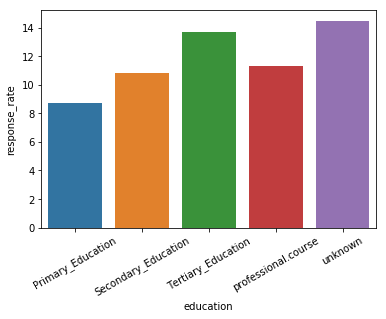

In [46]:
ax = sns.barplot(x='education', y='response_rate', data=agg_education)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

You can note that the response rate is lowest for people with highest education qualification as primary education, which may be attributed, in part, to lack of awareness and a lack of trust between the bank and the customer. It is the highest for people with tertiary education.

#### Previous Default

In [47]:
loan['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [48]:
count_prospects_default = loan.groupby('default')['response'].sum().reset_index(name = 'count_prospects')

In [49]:
No_of_prospect_default = loan.groupby('default')['response'].count().reset_index(name = 'No_of_prospects')

In [50]:
agg_default = count_prospects_default.merge(No_of_prospect_default, on = 'default')

In [51]:
agg_default['response_rate'] = 100*(agg_default['count_prospects']/agg_default['No_of_prospects']).round(4)

In [52]:
agg_default

,default,count_prospects,No_of_prospects,response_rate
0,no,4197,32588,12.88
1,unknown,443,8597,5.15
2,yes,0,3,0.00


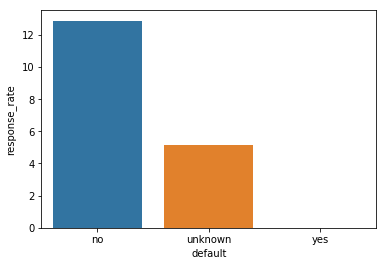

In [53]:
ax = sns.barplot(x='default', y='response_rate', data=agg_default)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### Housing

In [54]:
loan['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [55]:
count_prospects_housing = loan.groupby('housing')['response'].sum().reset_index(name = 'count_prospects')

In [56]:
No_of_prospect_housing = loan.groupby('housing')['response'].count().reset_index(name = 'No_of_prospects')

In [57]:
agg_housing = count_prospects_housing.merge(No_of_prospect_housing, on = 'housing')

In [58]:
agg_housing['response_rate'] = 100*(agg_housing['count_prospects']/agg_housing['No_of_prospects']).round(4)

In [59]:
agg_housing

,housing,count_prospects,No_of_prospects,response_rate
0,no,2026,18622,10.88
1,unknown,107,990,10.81
2,yes,2507,21576,11.62


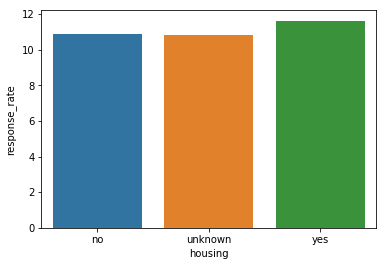

In [60]:
ax = sns.barplot(x='housing', y='response_rate', data=agg_housing)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that there is a slight uptick in the response rate for people with housing, though it is probably not very significant

#### Loan

In [61]:
loan['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [62]:
count_prospects_loan = loan.groupby('loan')['response'].sum().reset_index(name = 'count_prospects')

In [63]:
No_of_prospect_loan = loan.groupby('loan')['response'].count().reset_index(name = 'No_of_prospects')

In [64]:
agg_loan = count_prospects_loan.merge(No_of_prospect_loan, on = 'loan')

In [65]:
agg_loan['response_rate'] = 100*(agg_loan['count_prospects']/agg_loan['No_of_prospects']).round(4)

In [66]:
agg_loan

,loan,count_prospects,No_of_prospects,response_rate
0,no,3850,33950,11.34
1,unknown,107,990,10.81
2,yes,683,6248,10.93


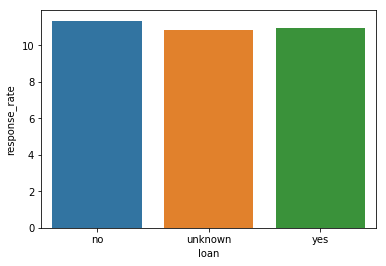

In [67]:
ax = sns.barplot(x='loan', y='response_rate', data=agg_loan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can see there seems to be very little correlation between a prospect having a personal loan and the likelihood of him/her responding positively to the investment product

Now that we have had a look at the client data, we will move to the last contact information.

There are four features in the given dataset which cover this information. (Refer to the data dictionary for the same)

- Contact: contact communication type
- Month: last contact month of year
- Day_of_week: last contact day of the week
- Duration: last contact duration, in seconds 

Please note that the attribute, duration highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Contact

In [68]:
loan['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [69]:
count_prospects_contact = loan.groupby('contact')['response'].sum().reset_index(name = 'count_prospects')

In [70]:
No_of_prospect_contact = loan.groupby('contact')['response'].count().reset_index(name = 'No_of_prospects')

In [71]:
agg_contact = count_prospects_contact.merge(No_of_prospect_contact, on = 'contact')

In [72]:
agg_contact['response_rate'] = 100*(agg_contact['count_prospects']/agg_contact['No_of_prospects']).round(4)

In [73]:
agg_contact

,contact,count_prospects,No_of_prospects,response_rate
0,cellular,3853,26144,14.74
1,telephone,787,15044,5.23


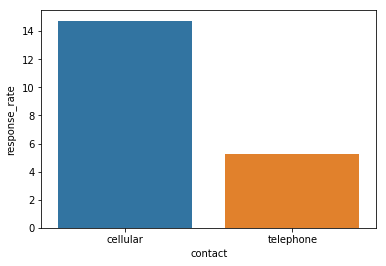

In [74]:
ax = sns.barplot(x='contact', y='response_rate', data=agg_contact)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that the prospective customers contacted through cellular medium are significantly ore likely to opt in to the investment scheme compared to customers contacted through telephonic medium.

#### Month

In [75]:
loan['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [76]:
count_prospects_month = loan.groupby('month')['response'].sum().reset_index(name = 'count_prospects')

In [77]:
No_of_prospect_month = loan.groupby('month')['response'].count().reset_index(name = 'No_of_prospects')

In [78]:
agg_month = count_prospects_month.merge(No_of_prospect_month, on = 'month')

In [79]:
agg_month['response_rate'] = 100*(agg_month['count_prospects']/agg_month['No_of_prospects']).round(4)

In [80]:
agg_month

,month,count_prospects,No_of_prospects,response_rate
0,apr,539,2632,20.48
1,aug,655,6178,10.60
2,dec,89,182,48.90
3,jul,649,7174,9.05
4,jun,559,5318,10.51
5,mar,276,546,50.55
6,may,886,13769,6.43
7,nov,416,4101,10.14
8,oct,315,718,43.87
9,sep,256,570,44.91


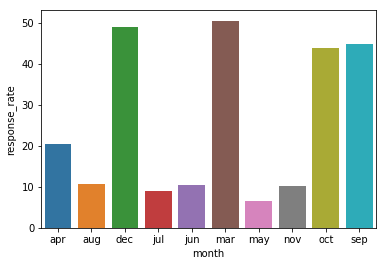

In [81]:
ax = sns.barplot(x='month', y='response_rate', data=agg_month)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the four months of december, march, october and september appear to be the best to contact the potential customers. However, please note that these our months have the fewest data entries as well, so it is not certain, how well it would behave when calls are made at a high volume.

#### Day of the week

In [82]:
loan['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [83]:
count_prospects_day = loan.groupby('day_of_week')['response'].sum().reset_index(name = 'count_prospects')

In [84]:
No_of_prospect_day = loan.groupby('day_of_week')['response'].count().reset_index(name = 'No_of_prospects')

In [85]:
agg_day = count_prospects_day.merge(No_of_prospect_day, on = 'day_of_week')

In [86]:
agg_day['response_rate'] = 100*(agg_day['count_prospects']/agg_day['No_of_prospects']).round(4)

In [87]:
agg_day

,day_of_week,count_prospects,No_of_prospects,response_rate
0,fri,846,7827,10.81
1,mon,847,8514,9.95
2,thu,1045,8623,12.12
3,tue,953,8090,11.78
4,wed,949,8134,11.67


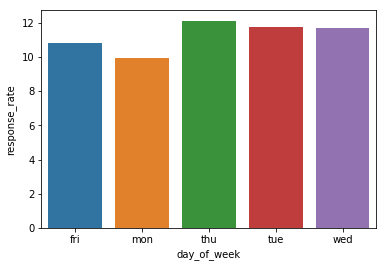

In [88]:
ax = sns.barplot(x='day_of_week', y='response_rate', data=agg_day)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can note that response rate is lowest on monday, while being highest on thursday. However, the gap isn't very big.

#### Duration of the call

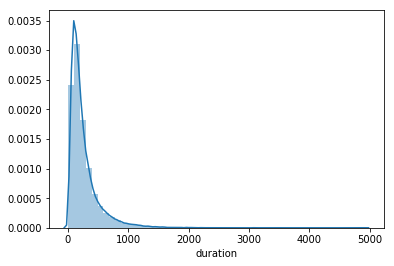

In [89]:
sns.distplot(loan['duration'])
plt.show()

As we know that this is a continuos variable, we will create a box plot

In [90]:
loan['duration'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
95%        752.650000
99%       1271.130000
max       4918.000000
Name: duration, dtype: float64

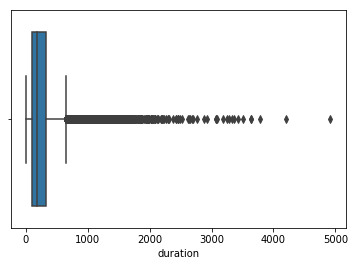

In [91]:
sns.boxplot(x='duration', data=loan)
plt.show()

Since less than one percent of entires have duration greater than 1271, we can assume all entries with duration greater than 1271 as having duration as 1271.

In [92]:
loan['duration'][loan['duration']>1271] =1271

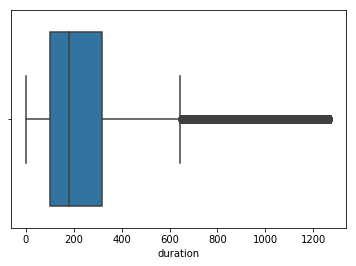

In [93]:
sns.boxplot(x='duration', data=loan)
plt.show()

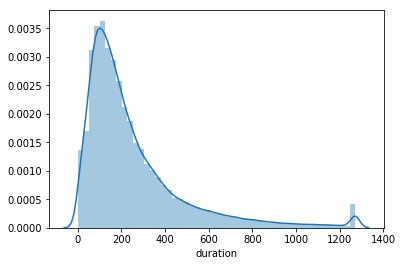

In [94]:
sns.distplot(loan['duration'])
plt.show()

Now that we have looked at client data and the data related to last contact, we will look at some of the other attributes.

- Campaign: number of contacts performed during this campaign and for this client
- Pdays: number of days that passed by after the client was last contacted from a previous campaign
- Previous: number of contacts performed before this campaign and for this client
- Poutcome: outcome of the previous marketing campaign

#### Campaign

In [95]:
loan['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

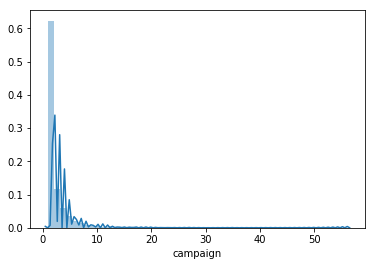

In [96]:
sns.distplot(loan['campaign'])
plt.show()

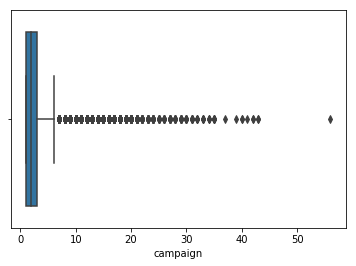

In [97]:
# We will create a box plot

sns.boxplot(x='campaign', data=loan)
plt.show()

In [98]:
loan['campaign'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
95%          7.000000
99%         14.000000
max         56.000000
Name: campaign, dtype: float64

Once again, we can merga all data entries with contacts greater than 14 as having campaign contact as 14

In [99]:
loan['campaign'][loan['campaign']>14] =14

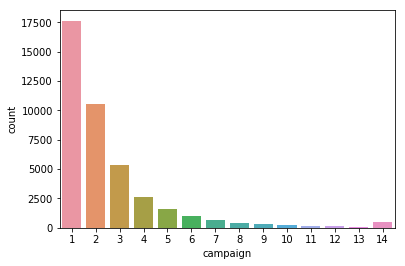

In [100]:
sns.countplot(loan['campaign'])
plt.show()

In [101]:
count_prospects_campaign = loan.groupby('campaign')['response'].sum().reset_index(name = 'count_prospects')

In [102]:
No_of_prospect_campaign = loan.groupby('campaign')['response'].count().reset_index(name = 'No_of_prospects')

In [103]:
agg_campaign = count_prospects_campaign.merge(No_of_prospect_campaign, on = 'campaign')

In [104]:
agg_campaign['response_rate'] = 100*(agg_campaign['count_prospects']/agg_campaign['No_of_prospects']).round(4)

In [105]:
agg_campaign

,campaign,count_prospects,No_of_prospects,response_rate
0,1,2300,17642,13.04
1,2,1211,10570,11.46
2,3,574,5341,10.75
3,4,249,2651,9.39
4,5,120,1599,7.50
5,6,75,979,7.66
6,7,38,629,6.04
7,8,17,400,4.25
8,9,17,283,6.01
9,10,12,225,5.33


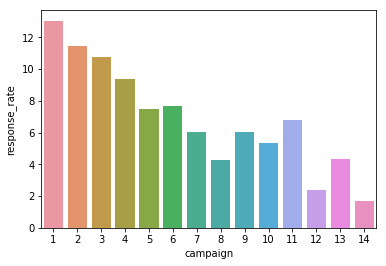

In [106]:
ax = sns.barplot(x='campaign', y='response_rate', data=agg_campaign)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

Interesting to note, that the response rate gradually decreases as the number of campaign contacts increases.

#### Gap after the last contact

In [107]:
loan['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

We are going to divide the pdays into three buckets, that is contacted within the first ten days, contacted after first ten days and first time contacted. Note that the pdays value of 999 means client was bot previously contacted.

In [108]:
loan['pdays'][loan['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])]='Contacted_in_first_10days'

loan['pdays'][loan['pdays'].isin([999])]='First_time_contacted'

loan['pdays'][~loan['pdays'].isin(['Contacted_in_first_10days','First_time_contacted'])]='Contacted_after_10days'

In [109]:
loan['pdays'].value_counts()

First_time_contacted         39673
Contacted_in_first_10days     1311
Contacted_after_10days         204
Name: pdays, dtype: int64

In [110]:
count_prospects_pdays = loan.groupby('pdays')['response'].sum().reset_index(name = 'count_prospects')

In [111]:
No_of_prospect_pdays = loan.groupby('pdays')['response'].count().reset_index(name = 'No_of_prospects')

In [112]:
agg_pdays = count_prospects_pdays.merge(No_of_prospect_pdays, on = 'pdays')

In [113]:
agg_pdays['response_rate'] = 100*(agg_pdays['count_prospects']/agg_pdays['No_of_prospects']).round(4)

In [114]:
agg_pdays

,pdays,count_prospects,No_of_prospects,response_rate
0,Contacted_after_10days,116,204,56.86
1,Contacted_in_first_10days,851,1311,64.91
2,First_time_contacted,3673,39673,9.26


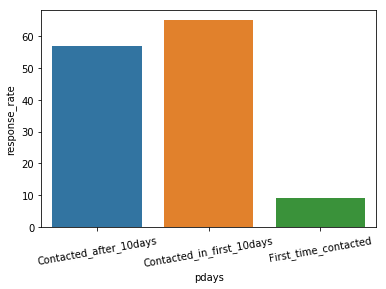

In [115]:
ax = sns.barplot(x='pdays', y='response_rate', data=agg_pdays)
ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
plt.show()

Though there is a huge difference in the response rates of the three categories, it is important to note that there is also a huge difference in the volume of data entries in these categories

#### Previous

In [116]:
loan['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Since the data ranges from 0 to 7, we are going to break it into three categories, that is never contacted, contacted less than three times and contacted greater than three times

In [117]:
loan['previous'][loan['previous'].isin([0])]='Never contacted'
loan['previous'][loan['previous'].isin([1,2,3])]='Less_than_3_times'
loan['previous'][loan['previous'].isin([4,5,6,7])]='More than_3_times'

In [118]:
loan['previous'].value_counts()

Never contacted      35563
Less_than_3_times     5531
More than_3_times       94
Name: previous, dtype: int64

In [119]:
count_prospects_previous = loan.groupby('previous')['response'].sum().reset_index(name = 'count_prospects')

In [120]:
No_of_prospect_previous = loan.groupby('previous')['response'].count().reset_index(name = 'No_of_prospects')

In [121]:
agg_previous = count_prospects_previous.merge(No_of_prospect_previous, on = 'previous')

In [122]:
agg_previous['response_rate'] = 100*(agg_previous['count_prospects']/agg_previous['No_of_prospects']).round(4)

In [123]:
agg_previous

,previous,count_prospects,No_of_prospects,response_rate
0,Less_than_3_times,1445,5531,26.13
1,More than_3_times,54,94,57.45
2,Never contacted,3141,35563,8.83


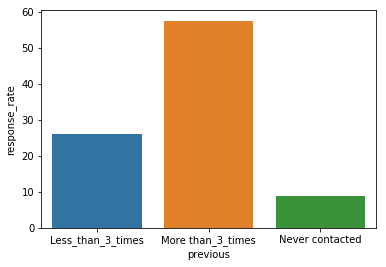

In [124]:
ax = sns.barplot(x='previous', y='response_rate', data=agg_previous)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the response rate is greatest for the the potential customers having previous contact of more than three. However, please note that  the number of data entries is very low for such cases, hence it's difficult to draw any inferences.

Now that we have analysed all the client related information, we will move to the wider social and economic variables, which gives us a clue of the conditions when a client is more likely to buy the product.

- emp.var.rate: Employment Variation Rate - Quarterly Indicator
- cons.price.idx: Consumer Price Index - Monthly Indicator 
- cons.conf.idx: Consumer Confidence Index - Monthly Indicator 
- euribor3m: Euribor 3 Month Rate - Daily Indicator
- nr.employed: Number of Employees - Quarterly Indicator

In [125]:
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

#### Employment Variation Rate

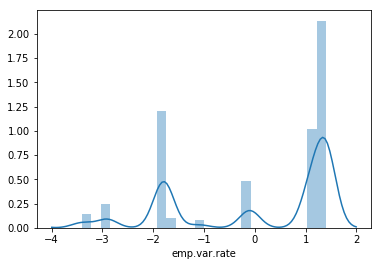

In [126]:
sns.distplot(loan['emp.var.rate'])
plt.show()

In [127]:
loan['emp.var.rate'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
95%          1.400000
99%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [128]:
loan['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [129]:
count_prospects_emp_var_rate = loan.groupby('emp.var.rate')['response'].sum().reset_index(name = 'count_prospects')

In [130]:
No_of_prospect_emp_var_rate = loan.groupby('emp.var.rate')['response'].count().reset_index(name = 'No_of_prospects')

In [131]:
agg_emp_var_rate = count_prospects_emp_var_rate.merge(No_of_prospect_emp_var_rate, on = 'emp.var.rate')

In [132]:
agg_emp_var_rate['response_rate'] = 100*(agg_emp_var_rate['count_prospects']/agg_emp_var_rate['No_of_prospects']).round(4)

In [133]:
agg_emp_var_rate

,emp.var.rate,count_prospects,No_of_prospects,response_rate
0,-3.4,454,1071,42.39
1,-3.0,88,172,51.16
2,-2.9,594,1663,35.72
3,-1.8,1461,9184,15.91
4,-1.7,403,773,52.13
5,-1.1,301,635,47.40
6,-0.2,1,10,10.00
7,-0.1,232,3683,6.30
8,1.1,240,7763,3.09
9,1.4,866,16234,5.33


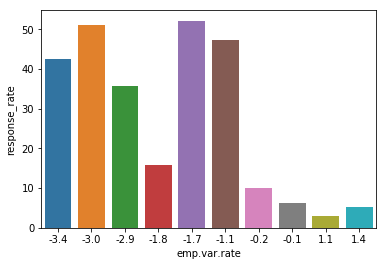

In [134]:
ax = sns.barplot(x='emp.var.rate', y='response_rate', data=agg_emp_var_rate)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can note that a negative employment variation rate seems to be related to higher response rates.

#### Consumer Price Index

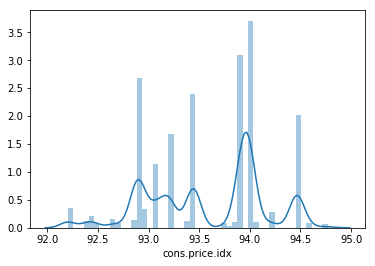

In [135]:
sns.distplot(loan['cons.price.idx'])
plt.show()

In [136]:
loan['cons.price.idx'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
95%         94.465000
99%         94.465000
max         94.767000
Name: cons.price.idx, dtype: float64

In [137]:
loan['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

#### Euribor three month rate

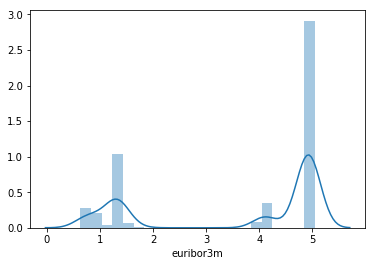

In [138]:
sns.distplot(loan['euribor3m'])
plt.show()

In [139]:
loan['euribor3m'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
95%          4.966000
99%          4.968000
max          5.045000
Name: euribor3m, dtype: float64

#### Number of employeees

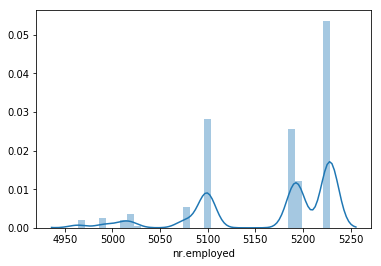

In [140]:
sns.distplot(loan['nr.employed'])
plt.show()

In [141]:
loan['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [142]:
loan['nr.employed'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
95%       5228.100000
99%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

Now that we have completed basic exploratory analysis, we can move to the next stage, that is data cleaning and data preparation

#### Data Preparation

Once Exploratory Data anlysis has been performed, we move to data preparation for the purpose of modelling.

In [143]:
# inspect the columns

loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

In [144]:
# Droping the column age_bins we had created for the purpose of data visualisation

loan.drop(columns = 'age_bins', inplace = True)

In [145]:
# Creating a dummy variable for the variable 'job' and dropping the first one.

job = pd.get_dummies(loan['job'],prefix='job',drop_first=True)

#Adding the results to the master dataframe

loan = pd.concat([loan,job],axis=1)

In [146]:
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,0,0,0,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0


Notice that we have created a set of dummy columns for the feature job. Similarly, we are going to do the same for other categorical variables.

In [147]:
# Creating dummy variable for marital column

marital = pd.get_dummies(loan['marital'],prefix='marital',drop_first=True)
loan = pd.concat([loan,marital],axis=1)

In [148]:
# Creating dummy variable for education column

education = pd.get_dummies(loan['education'],prefix='education',drop_first=True)
loan = pd.concat([loan,education],axis=1)

In [149]:
# Creating dummy variable for default column

default = pd.get_dummies(loan['default'],prefix='default',drop_first=True)
loan = pd.concat([loan,default],axis=1)

In [150]:
# Creating dummy variable for housing column

housing = pd.get_dummies(loan['housing'],prefix='housing',drop_first=True)
loan = pd.concat([loan,housing],axis=1)

In [151]:
# Creating dummy variable for loan column

loan_v= pd.get_dummies(loan['loan'],prefix='loan',drop_first=True)
loan = pd.concat([loan,loan_v],axis=1)

In [152]:
# Creating dummy variable for contact column

contact = pd.get_dummies(loan['contact'],prefix='contact',drop_first=True)
loan = pd.concat([loan,contact],axis=1)

In [153]:
# Creating dummy variable for month column

month = pd.get_dummies(loan['month'],prefix='month',drop_first=True)
loan = pd.concat([loan,month],axis=1)

In [154]:
# Creating dummy variable for day_of_week column

day_of_week = pd.get_dummies(loan['day_of_week'],prefix='day_of_week',drop_first=True)
loan = pd.concat([loan,day_of_week],axis=1)

In [155]:
# Creating dummy variable for pdays column

pdays = pd.get_dummies(loan['pdays'],prefix='pdays',drop_first=True)
loan = pd.concat([loan,pdays],axis=1)

In [156]:
# Creating dummy variable for previous column

previous = pd.get_dummies(loan['previous'],prefix='previous',drop_first=True)
loan = pd.concat([loan,previous],axis=1)

In [157]:
# Creating dummy variable for poutcome column

poutcome = pd.get_dummies(loan['poutcome'],prefix='poutcome',drop_first=True)
loan = pd.concat([loan,poutcome],axis=1)

In [158]:
# inspect the dataframe

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0


In [159]:
# Drop all features for whom dummy variable has been created

loan.drop(columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','pdays','previous','poutcome'], inplace=True)

In [160]:
loan.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,job_blue-collar,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0


In [161]:
# Import library to split the dataset into test and train

from sklearn.model_selection import train_test_split

In [162]:
# Putting feature variable to X
X = loan.drop(['response'],axis=1)

# Putting response variable to y
y = loan['response']

In [163]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [164]:
X_train_new = X_train
X_test_new = X_test

#### Standardisation

In [165]:
X_train.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
7019,31,102,4,1.1,93.994,-36.4,4.860,5191.0,0,0,...,0,1,0,0,0,1,0,1,1,0
27175,51,218,3,-0.1,93.200,-42.0,4.021,5195.8,0,0,...,0,0,0,0,0,1,0,1,1,0
15817,39,333,3,1.4,93.918,-42.7,4.960,5228.1,0,0,...,1,0,0,0,0,1,0,1,1,0
40971,68,130,4,-1.1,94.601,-49.5,1.000,4963.6,0,0,...,1,0,0,0,0,1,0,0,0,0
8467,37,267,3,1.4,94.465,-41.8,4.864,5228.1,0,0,...,0,0,1,0,0,1,0,1,1,0


In [166]:
X_train = X_train.drop(['duration'],axis=1)
X_test = X_test.drop(['duration'],axis=1)

In [167]:
# Standardisation continuous features for X_train
X_train_df = X_train[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [168]:
std_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

In [169]:
X_train = X_train.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [170]:
X_train = pd.concat([X_train,std_X_train_df],axis=1)

In [171]:
X_train.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7019,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.877019,0.646930,0.649758,0.723298,0.891826,0.715448,0.333618
27175,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1.084499,0.213946,-0.114599,-0.650827,-0.319720,0.231937,0.400051
15817,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.092412,0.213946,0.840847,0.591769,-0.471164,0.773077,0.847088
40971,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2.751789,0.646930,-0.751563,1.773794,-1.942327,-1.509050,-2.813633
8467,0,0,0,0,0,0,0,0,1,0,...,1,1,0,-0.288564,0.213946,0.840847,1.538427,-0.276451,0.717753,0.847088


In [172]:
# Standardisation continuous features for X_train
X_test_df = X_test[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [173]:
std_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()

In [174]:
X_test = X_test.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [175]:
X_test = pd.concat([X_test,std_X_test_df],axis=1)

In [176]:
X_test.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
33148,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-1.182984,-0.651460,-1.199007,-1.172918,-1.237193,-1.348603,-0.944859
27585,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0.100062,0.663413,-0.118526,-0.644728,-0.332420,0.226981,0.393573
15722,1,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.590809,-0.651460,0.834840,0.590583,-0.483215,0.768913,0.840640
40349,0,0,0,0,0,0,0,0,0,0,...,0,0,1,-1.182984,-0.213169,-1.135450,0.778116,0.464642,-1.574841,-2.432774
2576,0,0,0,0,0,0,1,0,0,0,...,1,1,0,1.481803,-0.213169,0.644167,0.721340,0.873944,0.708890,0.327136


In [177]:
import statsmodels.api as sm

In [178]:
X_train.shape

(28831, 50)

In [179]:
X_test.shape

(12357, 50)

### Modelling

Now that the data preparation step is complete, we will jump straight into Logistic Regression

#### Logistic Regression

In [180]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [181]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [182]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28782
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7933.3
Date:                Mon, 29 Jul 2019   Deviance:                       15867.
Time:                        21:46:09   Pearson chi2:                 2.92e+04
No. Iterations:                    19   Covariance Type:             nonrobust
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.6435      0.284     -5.777      0.000      -2.201      -1.086
job_blue-collar                    -0.1547      0.083     -1.873      0.061      -0.317       0.007
job_entrepreneur                   -0.2347      0.132     -1.776      0.076      -0.494       0.024
job_housemaid                       0.0296      0.148      0.201      0.841      -0.260       0.319
job_management                     -0.1551      0.092     -1.690      0.091      -0.335       0.025
job_retired                         0.2281      0.110      2.071      0.038       0.012       0.444
job_self-employed                  -0.0586      0.121     -0.483      0.629      -0.297       0.179
job_services                       -0.0573      0.088     -0.649      0.516      -0.230       0.116
job_student                         0.2777      0.120      2.324      0.020       0.043       0.512
job_technician                     -0.0158      0.075     -0.211      0.833      -0.162       0.131
job_unemployed                     -0.0249      0.134     -0.186      0.853      -0.288       0.238
job_unknown                        -0.0977      0.241     -0.406      0.685      -0.569       0.374
marital_married                     0.0546      0.072      0.761      0.446      -0.086       0.195
marital_single                      0.1182      0.082      1.444      0.149      -0.042       0.279
education_Secondary_Education       0.0322      0.072      0.447      0.655      -0.109       0.174
education_Tertiary_Education        0.1214      0.073      1.663      0.096      -0.022       0.265
education_professional.course       0.0775      0.086      0.902      0.367      -0.091       0.246
education_unknown                   0.1810      0.109      1.663      0.096      -0.032       0.394
default_unknown                    -0.2785      0.070     -4.003      0.000      -0.415      -0.142
default_yes                       -17.5533   1.25e+04     -0.001      0.999   -2.45e+04    2.45e+04
housing_unknown                    -0.0493      0.071     -0.693      0.489      -0.189       0.090
housing_yes                        -0.0349      0.043     -0.809      0.419      -0.120       0.050
loan_unknown                       -0.0493      0.071     -0.693      0.489      -0.189       0.090
loan_yes                            0.0121      0.059      0.203      0.839      -0.104       0.128
contact_telephone                  -0.6338      0.079     -8.055      0.000      -0.788      -0.480
month_aug                           0.4285      0.128      3.346      0.001       0.178       0.679
month_dec                           0.2895      0.226      1.282      0.200      -0.153       0.732
month_jul                          -0.0148      0.100     -0.148      0.882      -0.211       0.181
month_jun                          -0.6888      0.132     -5.2

#### Feature Selection Using RFE

In [183]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [184]:
col = X_train.columns[rfe.support_]

In [185]:
X_train.columns[~rfe.support_]

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_technician', 'job_unemployed', 'job_unknown', 'marital_married',
       'marital_single', 'education_Secondary_Education',
       'education_Tertiary_Education', 'education_professional.course',
       'education_unknown', 'default_yes', 'housing_unknown', 'housing_yes',
       'loan_unknown', 'loan_yes', 'month_dec', 'month_jul', 'month_oct',
       'month_sep', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'pdays_Contacted_in_first_10days', 'previous_More than_3_times',
       'poutcome_nonexistent', 'age', 'campaign', 'cons.conf.idx',
       'nr.employed'],
      dtype='object')

##### Assessing the model with StatsModels

In [186]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = logm2.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28815
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7972.6
Date:                Mon, 29 Jul 2019   Deviance:                       15945.
Time:                        21:46:15   Pearson chi2:                 2.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.4597      0.215     -6.793      0.000      -1.881      -1.039
job_student                    0.3090      0.105      2.949      0.003       0.104       0.514
default_unknown               -0.3084      0.067     -4.575      0.000      -0.441      -0.176
contact_telephone             -0.5551      0.069     -8.006      0.000      -0.691      -0.419
month_aug                      0.5132      0.078      6.540      0.000       0.359       0.667
month_jun                     -0.6064      0.082     -7.418      0.000      -0.767      -0.446
month_mar                      1.3251      0.119     11.173      0.000       1.093       1.558
month_may                     -0.5252      0.063     -8.331      0.000      -0.649      -0.402
month_nov                     -0.5885      0.085     -6.937      0.000      -0.755      -0.422
day_of_week_mon               -0.3310      0.054     -6.097      0.000      -0.437      -0.225
pdays_First_time_contacted    -0.9739      0.216     -4.518      0.000      -1.396      -0.551
previous_Never contacted       0.4852      0.067      7.241      0.000       0.354       0.617
poutcome_success               0.8942      0.219      4.086      0.000       0.465       1.323
emp.var.rate                  -2.4413      0.149    -16.410      0.000      -2.733      -2.150
cons.price.idx                 0.9868      0.057     17.399      0.000       0.876       1.098
euribor3m                      1.0224      0.124      8.239      0.000       0.779       1.266
==============================================================================================
"""

In [187]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [188]:
vif1 = pd.DataFrame()
vif1['Features'] = X_train[col].columns
vif1['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,Features,VIF
12,emp.var.rate,75.09
14,euribor3m,50.86
9,pdays_First_time_contacted,15.16
10,previous_Never contacted,11.93
13,cons.price.idx,11.30
2,contact_telephone,4.77
6,month_may,3.32
3,month_aug,2.56
4,month_jun,2.29
7,month_nov,1.92


In [189]:
#we can see above the VIF of `emp.var.rate' is very high. Dropping it and creating model again.
#Logistic Regression
X_train_sm1 = X_train_sm.drop(['emp.var.rate'],axis = 1)
logm3 = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial())
res2 = logm3.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28816
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8103.3
Date:                Mon, 29 Jul 2019   Deviance:                       16207.
Time:                        21:46:16   Pearson chi2:                 3.11e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.3334      0.212     -6.284      0.000      -1.749      -0.918
job_student                    0.3809      0.103      3.696      0.000       0.179       0.583
default_unknown               -0.3557      0.067     -5.304      0.000      -0.487      -0.224
contact_telephone             -0.1751      0.062     -2.803      0.005      -0.298      -0.053
month_aug                      0.0450      0.071      0.634      0.526      -0.094       0.184
month_jun                      0.0085      0.074      0.116      0.908      -0.136       0.153
month_mar                      0.7908      0.115      6.870      0.000       0.565       1.016
month_may                     -0.9389      0.057    -16.434      0.000      -1.051      -0.827
month_nov                     -0.1173      0.079     -1.486      0.137      -0.272       0.037
day_of_week_mon               -0.3309      0.054     -6.175      0.000      -0.436      -0.226
pdays_First_time_contacted    -1.1627      0.213     -5.470      0.000      -1.579      -0.746
previous_Never contacted       0.4774      0.065      7.302      0.000       0.349       0.606
poutcome_success               0.8134      0.216      3.771      0.000       0.391       1.236
cons.price.idx                 0.1748      0.027      6.573      0.000       0.123       0.227
euribor3m                     -0.9600      0.030    -32.211      0.000      -1.018      -0.902
==============================================================================================
"""

In [190]:
vif2 = pd.DataFrame()
X = X_train_sm1
vif2['Features'] = X.columns
vif2['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

,Features,VIF
0,const,288.25
10,pdays_First_time_contacted,10.41
12,poutcome_success,9.91
13,cons.price.idx,4.06
14,euribor3m,3.79
3,contact_telephone,2.40
7,month_may,2.08
5,month_jun,1.81
4,month_aug,1.74
11,previous_Never contacted,1.64


In [191]:
#we can see above the VIF of `pdays_First_time_contacted' is very high. Dropping it and creating model again.
#Logistic Regression
X_train_sm2 = X_train_sm1.drop(['pdays_First_time_contacted'],axis = 1)
logm4 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res3 = logm4.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28817
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8117.8
Date:                Mon, 29 Jul 2019   Deviance:                       16236.
Time:                        21:46:16   Pearson chi2:                 3.12e+04
No. Iterations:                     6   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.4307      0.071    -34.019      0.000      -2.571      -2.291
job_student                  0.4096      0.102      3.997      0.000       0.209       0.611
default_unknown             -0.3570      0.067     -5.326      0.000      -0.488      -0.226
contact_telephone           -0.1757      0.062     -2.813      0.005      -0.298      -0.053
month_aug                    0.0702      0.071      0.993      0.320      -0.068       0.209
month_jun                    0.0041      0.073      0.055      0.956      -0.140       0.148
month_mar                    0.7987      0.115      6.958      0.000       0.574       1.024
month_may                   -0.9433      0.057    -16.524      0.000      -1.055      -0.831
month_nov                   -0.0974      0.079     -1.237      0.216      -0.252       0.057
day_of_week_mon             -0.3305      0.054     -6.173      0.000      -0.435      -0.226
previous_Never contacted     0.4059      0.063      6.436      0.000       0.282       0.530
poutcome_success             1.8916      0.090     21.041      0.000       1.715       2.068
cons.price.idx               0.1884      0.026      7.127      0.000       0.137       0.240
euribor3m                   -0.9728      0.030    -32.809      0.000      -1.031      -0.915
============================================================================================
"""

In [192]:
vif3 = pd.DataFrame()
X = X_train_sm2
vif3['Features'] = X.columns
vif3['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif3['VIF'] = round(vif3['VIF'], 2)
vif3 = vif3.sort_values(by = "VIF", ascending = False)
vif3

,Features,VIF
0,const,15.39
12,cons.price.idx,4.01
13,euribor3m,3.74
3,contact_telephone,2.40
7,month_may,2.08
5,month_jun,1.81
4,month_aug,1.74
10,previous_Never contacted,1.60
8,month_nov,1.51
11,poutcome_success,1.36


In [193]:
# Getting the predicted values on the train set
y_train_pred = res3.predict(X_train_sm2)
y_train_pred[:10]

7019     0.024046
27175    0.066232
15817    0.047615
40971    0.277081
8467     0.068832
21860    0.042740
11416    0.065495
27833    0.411952
26816    0.075772
28102    0.271175
dtype: float64

In [194]:
### y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

7019     0.024046
27175    0.066232
15817    0.047615
40971    0.277081
8467     0.068832
21860    0.042740
11416    0.065495
27833    0.411952
26816    0.075772
28102    0.271175
dtype: float64

##### Creating a dataframe with the actual response flag and the predicted probabilities

In [195]:
y_train_pred_final = pd.DataFrame({'Response':y_train.values, 'Response_Prob':y_train_pred, 'duration':X_train_new.duration})
y_train_pred_final.head()

,Response,Response_Prob,duration
7019,0,0.024046,102
27175,0,0.066232,218
15817,0,0.047615,333
40971,0,0.277081,130
8467,0,0.068832,267


In [196]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Response_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Response,Response_Prob,duration,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7019,0,0.024046,102,1,0,0,0,0,0,0,0,0,0
27175,0,0.066232,218,1,0,0,0,0,0,0,0,0,0
15817,0,0.047615,333,1,0,0,0,0,0,0,0,0,0
40971,0,0.277081,130,1,1,1,0,0,0,0,0,0,0
8467,0,0.068832,267,1,0,0,0,0,0,0,0,0,0


In [197]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Response, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.113003  1.000000  0.000000
0.1   0.1  0.778155  0.670350  0.791890
0.2   0.2  0.845479  0.593616  0.877566
0.3   0.3  0.888662  0.375077  0.954092
0.4   0.4  0.898235  0.269490  0.978337
0.5   0.5  0.899310  0.196440  0.988855
0.6   0.6  0.898477  0.161142  0.992414
0.7   0.7  0.894697  0.097299  0.996285
0.8   0.8  0.888939  0.020872  0.999531
0.9   0.9  0.887101  0.000921  1.000000


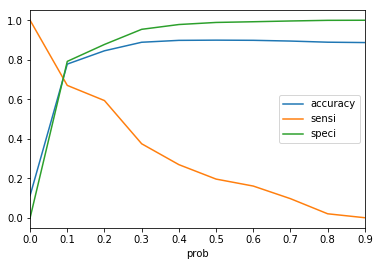

In [198]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [199]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Response_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Response,Response_Prob,duration,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
7019,0,0.024046,102,1,0,0,0,0,0,0,0,0,0,0
27175,0,0.066232,218,1,0,0,0,0,0,0,0,0,0,0
15817,0,0.047615,333,1,0,0,0,0,0,0,0,0,0,0
40971,0,0.277081,130,1,1,1,0,0,0,0,0,0,0,1
8467,0,0.068832,267,1,0,0,0,0,0,0,0,0,0,0


In [200]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Response, y_train_pred_final.final_predicted)

0.7781554576670945

In [201]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Response, y_train_pred_final.final_predicted )
confusion2

array([[20251,  5322],
       [ 1074,  2184]], dtype=int64)

In [202]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [203]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6703499079189686

In [204]:
# Let us calculate specificity
TN / float(TN+FP)

0.7918898838618856

In [205]:
y_train_pred_final.drop(columns = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], inplace=True)

In [206]:
y_train_pred_final

,Response,Response_Prob,duration,final_predicted
7019,0,0.024046,102,0
27175,0,0.066232,218,0
15817,0,0.047615,333,0
40971,0,0.277081,130,1
8467,0,0.068832,267,0
21860,0,0.042740,104,0
11416,0,0.065495,87,0
27833,1,0.411952,1271,1
26816,0,0.075772,627,0
28102,0,0.271175,383,1


In [207]:
model = logm1.fit()

In [208]:
X_test_sm = sm.add_constant(X_test)

In [209]:
y_test_pred = model.predict(X_test_sm)

In [210]:
y_test_pred

33148    0.120763
27585    0.059503
15722    0.047885
40349    0.861666
2576     0.041765
33359    0.099219
26890    0.071055
8032     0.025920
13180    0.068590
10102    0.070150
20715    0.045190
19226    0.065473
35201    0.061108
3682     0.040731
183      0.032166
32842    0.049730
18653    0.051826
25456    0.069944
27125    0.042673
25235    0.066961
19724    0.052473
26685    0.062314
8182     0.036035
37459    0.669129
26991    0.056373
10611    0.062053
34980    0.073582
16324    0.056875
40353    0.538108
16282    0.048695
           ...   
692      0.052930
4269     0.045463
34445    0.067838
19840    0.055244
37805    0.651407
11983    0.069675
30958    0.099299
40338    0.503533
13733    0.080548
38039    0.503391
37308    0.325136
9766     0.027386
12516    0.041507
38887    0.433521
16235    0.024428
31808    0.101958
40633    0.636316
1627     0.034093
20606    0.060346
10964    0.067632
11684    0.037625
29766    0.159855
35771    0.088529
31470    0.051703
13136    0

In [211]:
pred_prob = pd.DataFrame(pd.Series(y_test_pred), columns = ['pred_prob'])

In [212]:
pred_prob_final = pd.DataFrame({'duration':X_test_new.duration, 'Response_Prob':y_test_pred})

In [213]:
pred_prob_final

,duration,Response_Prob
33148,52,0.120763
27585,407,0.059503
15722,177,0.047885
40349,187,0.861666
2576,165,0.041765
33359,725,0.099219
26890,75,0.071055
8032,29,0.025920
13180,272,0.068590
10102,139,0.070150


In [214]:
decile_df = pd.concat([pred_prob_final, y_test],  ignore_index=True,axis=1)

In [215]:
decile_df.head()

,0,1,2
33148,52,0.120763,0
27585,407,0.059503,0
15722,177,0.047885,0
40349,187,0.861666,1
2576,165,0.041765,0


In [216]:
decile_df.rename({0:'duration', 1:'Response_Prob', 2:'Response'}, axis=1, inplace=True)

In [217]:
decile_df.head()

,duration,Response_Prob,Response
33148,52,0.120763,0
27585,407,0.059503,0
15722,177,0.047885,0
40349,187,0.861666,1
2576,165,0.041765,0


In [218]:
decile_df['final_predicted'] = decile_df.Response_Prob.map( lambda x: 1 if x > 0.1 else 0)

In [219]:
decile_df.head()

,duration,Response_Prob,Response,final_predicted
33148,52,0.120763,0,1
27585,407,0.059503,0,0
15722,177,0.047885,0,0
40349,187,0.861666,1,1
2576,165,0.041765,0,0


In [220]:
decile_new = y_train_pred_final.append(decile_df)

In [221]:
decile_new['Prospect_ID'] = decile_new.index + 100000

In [222]:
# Calculating duration in minutes
decile_new['duration_mins'] = decile_new.duration.map(lambda x:(x/60))

In [223]:
import math

In [224]:
#Calculating cost, considering cost as $1 per minute
decile_new['cost'] = decile_new.duration_mins.map(lambda x:math.ceil(x))

In [225]:
decile_new.rename({'Response':'Actual_response', 'Response_Prob':'Predicted_probablity', 'final_predicted':'Predicted_Response'}, axis=1, inplace=True)

In [226]:
decile_final = decile_new.sort_values(by=['Predicted_probablity'], ascending=[False])

### Q3. Create a data frame with the variables prospect ID, actual response, predicted response, predicted probability of response, duration of the call in seconds and cost of the call

While creating the data frame, list the cost of call for each prospect in a new column

In [227]:
decile_final

,Actual_response,Predicted_probablity,duration,Predicted_Response,Prospect_ID,duration_mins,cost
39340,1,9.067330e-01,101,1,139340,1.683333,2
39336,1,9.066381e-01,136,1,139336,2.266667,3
39258,1,9.060671e-01,215,1,139258,3.583333,4
40450,1,9.020609e-01,1064,1,140450,17.733333,18
40365,1,8.925504e-01,178,1,140365,2.966667,3
39153,1,8.917506e-01,363,1,139153,6.050000,7
39334,1,8.906684e-01,255,1,139334,4.250000,5
39255,1,8.900116e-01,290,1,139255,4.833333,5
40278,1,8.884697e-01,429,1,140278,7.150000,8
39227,1,8.873285e-01,700,1,139227,11.666667,12


In [228]:
##Q4 : Find the number of top X% prospects you should target to meet the business objective
decile_final['decile'] = pd.qcut(decile_final['Predicted_probablity'], 10, labels=np.arange(10, 0, -1))

In [229]:
lift_df = decile_final.groupby('decile')['Predicted_probablity'].count().reset_index()

In [230]:
lift_df.rename({'Predicted_probablity':'total'}, axis=1, inplace=True)

In [231]:
lift_df_pred = decile_final[decile_final['Actual_response']==1].groupby('decile')['Actual_response'].count().reset_index()

In [232]:
lift_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
decile    10 non-null category
total     10 non-null int64
dtypes: category(1), int64(1)
memory usage: 570.0 bytes


In [233]:
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')

In [234]:
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)

In [235]:
lift_df_final['cumresp'] = lift_df_final['Actual_response'].cumsum()

In [236]:
lift_df_final['gain'] = 100*(lift_df_final['cumresp']/sum(lift_df_final['Actual_response']))

In [237]:
lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))

### Q4. Find the number of top X% prospects you should target to meet the business objective

Report the average call duration for targeting the top X% prospects to the CMO

In [238]:
lift_df_final

,decile,total,Actual_response,cumresp,gain,cumlift
9,1,4075,1977,1977,42.607759,4.260776
8,2,4039,892,2869,61.831897,3.091595
7,3,4243,363,3232,69.655172,2.321839
6,4,3829,251,3483,75.064655,1.876616
5,5,4299,251,3734,80.474138,1.609483
4,6,4228,217,3951,85.150862,1.419181
3,7,4118,230,4181,90.107759,1.287254
2,8,4078,176,4357,93.900862,1.173761
1,9,3565,123,4480,96.551724,1.072797
0,10,4714,160,4640,100.000000,1.000000


Note that we can attain 80% of total conversions by targeting only top 50% of the total client base. This can be used in cost optimization and depending on the cost per call, we can determine, how many people should be part of the tele marketing campaign

In [239]:
#So we require to target only 50% of clients i.e. 20594 to have 80% target rate
decile_final_pred = decile_final.iloc[:20597,:]

In [240]:
decile_final_pred

,Actual_response,Predicted_probablity,duration,Predicted_Response,Prospect_ID,duration_mins,cost,decile
39340,1,0.906733,101,1,139340,1.683333,2,1
39336,1,0.906638,136,1,139336,2.266667,3,1
39258,1,0.906067,215,1,139258,3.583333,4,1
40450,1,0.902061,1064,1,140450,17.733333,18,1
40365,1,0.892550,178,1,140365,2.966667,3,1
39153,1,0.891751,363,1,139153,6.050000,7,1
39334,1,0.890668,255,1,139334,4.250000,5,1
39255,1,0.890012,290,1,139255,4.833333,5,1
40278,1,0.888470,429,1,140278,7.150000,8,1
39227,1,0.887328,700,1,139227,11.666667,12,1


In [241]:
#Average call duration for targeting the top 50% prospects to the CMO
print(decile_final_pred['duration_mins'].mean())

4.418769723746225


### Q5. Create a lift chart

The x-axis should show the number of prospects contacted; the y-axis should show the ratio of the response rate using the model and the response rate without using the model

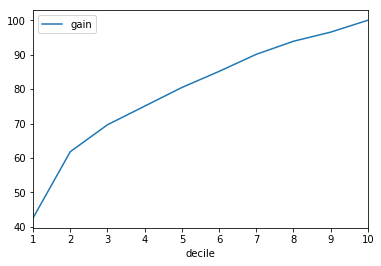

In [242]:
lift_df_final.plot.line(x='decile', y=['gain'])

### Q6. Determine the cost of acquisition

Consider cost = 1*number of contacts made in the current campaign; determine the cost incurred for acquiring 80% of customers using the predictive model

In [244]:
print(decile_final_pred['cost'].sum())

101434


Cost of acquisition is $101434